In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam,SGD

In [46]:
df =pd.read_csv("/content/CarPrice_Assignment.csv");
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

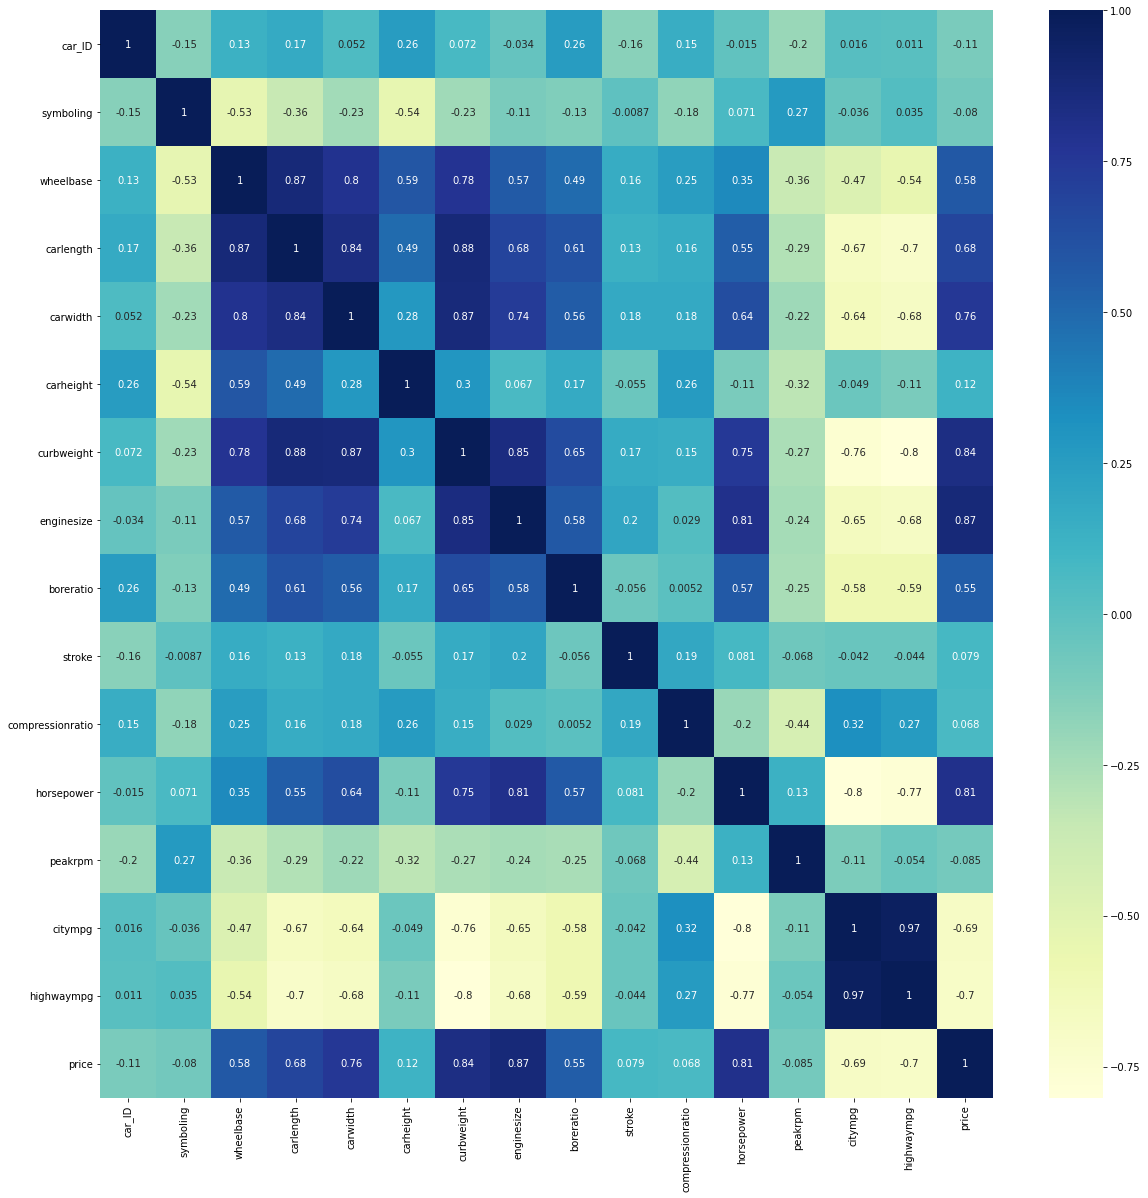

In [48]:

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [49]:
df.drop(['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)

In [50]:
df.notnull().all()

fueltype            True
aspiration          True
doornumber          True
carbody             True
drivewheel          True
enginelocation      True
wheelbase           True
carlength           True
carwidth            True
carheight           True
curbweight          True
enginetype          True
cylindernumber      True
enginesize          True
fuelsystem          True
boreratio           True
stroke              True
compressionratio    True
horsepower          True
peakrpm             True
citympg             True
highwaympg          True
price               True
dtype: bool

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [52]:
x = df.iloc[:,df.columns!='price'] 
y = df.loc[:,df.columns=='price']


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer( transformers= [('encoder', OneHotEncoder(), [0, 1 ,2 ,3 ,4, 5, 11, 12, 14])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [54]:
from sklearn.model_selection import train_test_split
x_t, x_test, y_t, y_test= train_test_split(x, y, test_size = 0.3, random_state = 30)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate= train_test_split(x_t, y_t, test_size = 0.2, random_state = 30)

In [56]:
x_validate

array([[0.0e+00, 1.0e+00, 1.0e+00, ..., 4.8e+03, 2.4e+01, 2.9e+01],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 6.0e+03, 1.6e+01, 2.3e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.5e+03, 1.6e+01, 2.2e+01],
       ...,
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.5e+03, 3.1e+01, 3.8e+01],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.5e+03, 3.1e+01, 3.8e+01],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.8e+03, 2.3e+01, 2.9e+01]])

In [71]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))


In [72]:
model.compile(optimizer="rmsprop",loss='mse', metrics=['mae'])

In [78]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 102651384.0000 - mae: 7450.4146
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 102579776.0000 - mae: 7468.4736
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 102579664.0000 - mae: 7458.1201
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 102483720.0000 - mae: 7459.4297
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 102491104.0000 - mae: 7452.9097
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 102492576.0000 - mae: 7447.9565
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 102412712.0000 - mae: 7443.0464
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 102371248.0000 - mae: 7436.4199
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 102329024.0000 - mae: 7405.2378
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1

In [80]:
model.evaluate(x_validate,y_validate)

1/1 [==============================] - 0s 19ms/step - loss: 134412304.0000 - mae: 8034.6865


[134412304.0, 8034.6865234375]

In [81]:
result=model.predict(x_test)
result[3]

array([13113.572, 13112.839, 13046.717, 13086.483,     0.   ,     0.   ],
      dtype=float32)